## Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import sys

import model_metrics

print(model_metrics.__version__)

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from model_tuner import Model, loadObjects
import model_tuner

from model_metrics import summarize_model_performance, plot_calibration_curve

## Step 2. Append the correct paths
# Add the parent directory to sys.path to access relevant .py scripts

print(os.path.join(os.pardir))
sys.path.append(os.path.join(os.pardir))
sys.path.append(".")

0.0.0a1
..


## Set Model Path

In [3]:
model_path = "../results/"

## Load The Model Object and Test Data

In [4]:
model = loadObjects(os.path.join(model_path, "logistic_regression_model.pkl"))

X_test = pd.read_parquet(os.path.join(model_path, "X_test.parquet"))
y_test = pd.read_parquet(os.path.join(model_path, "y_test.parquet"))

Object loaded!


## Set The Desired Naming Conventions

In [5]:
pipelines_or_models = [
    model,
]

# Model titles
model_titles = [
    "Logistic Regression",
]

## Summarize Model Performance

In [6]:
model_summary = summarize_model_performance(
    pipelines_or_models=pipelines_or_models,
    X=X_test,
    y=y_test,
    model_titles=model_titles,
    # model_threshold=thresholds,
    return_df=True,
    # custom_threshold=0.7,
)

model_summary

Model,Logistic Regression
Precision/PPV,0.781873
Average Precision,0.869025
Sensitivity/Recall,0.797764
Specificity,0.784449
F1-Score,0.789738
AUC ROC,0.880128
Brier Score,0.140390
Model Threshold,0.500000


## Plot The Calibration Curve

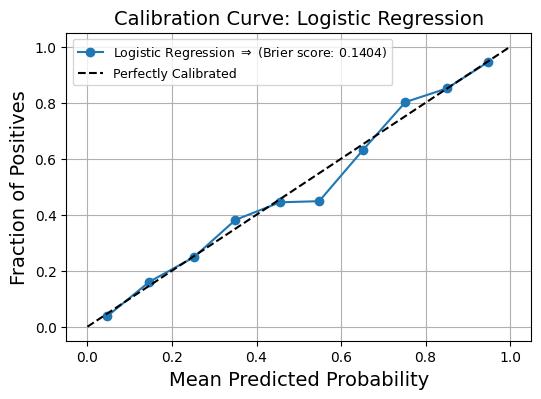

In [8]:
# Plot calibration curves in overlay mode
plot_calibration_curve(
    pipelines_or_models=pipelines_or_models,
    X=X_test,
    y=y_test,
    model_titles=model_titles,
    overlay=False,
    title="Calibration Curves",
    text_wrap=40,
    figsize=(6, 4),
    label_fontsize=14,
    tick_fontsize=9,
    bins=10,
    show_brier_score=True,
    # grid=True,
    # gridlines=False,
    linestyle_kwgs={"color": "black"},
)